In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
import re
import collections
import string # library used to deal with text data
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # plotting library
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
from itertools import cycle # used for cycling colors at plotly graphs
# import pandas_profiling # library for automatic EDA


In [4]:
from scipy import stats # statistical library
from statsmodels.stats.weightstats import ztest # statistical function for hypothesis testing
from IPython.display import display # display from IPython.display

In [5]:
# Importing the data and displaying some rows
df1 = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
df2 = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
df = pd.concat([df1, df2], ignore_index=True)
display(df.head(10))

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
7,7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
8,8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
9,9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741


In [6]:
# # The pandas profiling library is really useful on helping us understand the data we're working on.
# # It saves us some precious time on the EDA process.
# report = pandas_profiling.ProfileReport(df)

# # Let's now visualize the report generated by pandas_profiling.
# display(report)

# # Also, there is an option to generate an .HTML file containing all the information generated by the report.
# # report.to_file(output_file='report.html')

In [7]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


(None,
 id                           0
 Brand                   126758
 Material                110962
 Size                     87785
 Compartments                 0
 Laptop Compartment       98533
 Waterproof               94324
 Style                   104180
 Color                   133617
 Weight Capacity (kg)      1808
 Price                        0
 dtype: int64)

In [8]:
# from sklearn.impute import SimpleImputer

# # Handling categorical missing values using mode (most frequent value)
# categorical_cols = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
# cat_imputer = SimpleImputer(strategy="most_frequent")
# df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# # Handling numerical missing values using median
# num_imputer = SimpleImputer(strategy="median")
# df["Weight Capacity (kg)"] = num_imputer.fit_transform(df[["Weight Capacity (kg)"]])

# # Confirm if missing values are handled
# df.isnull().sum()


In [9]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from category_encoders import LeaveOneOutEncoder, TargetEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:


# Define Features and Target
target = df["Price"]
# df.drop(columns=["Price"], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


In [19]:
# Identify Numeric and Categorical Columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print(numeric_columns)
print(categorical_columns)
numeric_columns.remove('Price')
print(numeric_columns)

['id', 'Compartments', 'Weight Capacity (kg)', 'Price']
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
['id', 'Compartments', 'Weight Capacity (kg)']


In [13]:
test_data = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

In [21]:
# Function to apply imputation
def apply_imputation_with_test(X_train, X_test, test_data, numeric_columns, categorical_columns, imputer):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    test_data_imputed = test_data.copy()

    # Impute numeric columns
    if numeric_columns:
        X_train_imputed[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
        X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])
        test_data_imputed[numeric_columns] = imputer.transform(test_data[numeric_columns])
    # Impute categorical columns with a placeholder
    if categorical_columns:
        X_train_imputed[categorical_columns] = X_train[categorical_columns].fillna('Missing')
        X_test_imputed[categorical_columns] = X_test[categorical_columns].fillna('Missing')
        test_data_imputed[categorical_columns] = test_data[categorical_columns].fillna('Missing')

    return X_train_imputed, X_test_imputed, test_data_imputed

In [15]:
# Split Data (Before Applying Transformations)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [18]:
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# # Define imputation techniques
# imputers = {
#     'mean_imputer': SimpleImputer(strategy='mean'),
#     'median_imputer': SimpleImputer(strategy='median'),
#     'knn_imputer': KNNImputer(n_neighbors=5),
#     'iterative_imputer': IterativeImputer(random_state=42)
# }


In [16]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [90]:
# Function to apply imputation
def apply_imputation(X_train, X_test, numeric_columns, categorical_columns, imputer):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Impute numeric columns
    if numeric_columns:
        X_train_imputed[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
        X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])

    # Impute categorical columns with a placeholder
    if categorical_columns:
        X_train_imputed[categorical_columns] = X_train[categorical_columns].fillna('Missing')
        X_test_imputed[categorical_columns] = X_test[categorical_columns].fillna('Missing')

    return X_train_imputed, X_test_imputed

In [22]:
X_train_imputed, X_test_imputed, test_data_imputed = apply_imputation_with_test(X_train, X_test, test_data, numeric_columns, categorical_columns, imputer)


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.utils import plot_model


In [24]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat = encoder.fit_transform(X_train_imputed[categorical_columns])
X_test_cat = encoder.fit_transform(X_test_imputed[categorical_columns])
test_data_cat = encoder.fit_transform(test_data_imputed[categorical_columns])
# y_train_cat = encoder.fit_transform(y_train_imputed[categorical_columns])
# y_test_cat = encoder.fit_transform(y_test_imputed[categorical_columns])

In [25]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_imputed[numeric_columns])

X_test_num = scaler.fit_transform(X_test_imputed[numeric_columns])
test_data_num = scaler.fit_transform(test_data_imputed[numeric_columns])
# y_train_num = scaler.fit_transform(y_train_imputed[numeric_columns])

# y_test_num = scaler.fit_transform(y_test_imputed[numeric_columns])

In [26]:
X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed = np.hstack([X_test_num, X_test_cat])
test_data_processed = np.hstack([test_data_num, test_data_cat])
# y_train_processed = np.hstack([y_train_num, y_train_cat])
# y_test_processed = np.hstack([y_test_num, y_test_cat])

In [57]:
X_train_processed.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [58]:
X_train_imputed.info(), X_train_imputed.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3195454 entries, 2730815 to 2219110
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    float64
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(4), object(7)
memory usage: 292.6+ MB


(None,
 id                      0
 Brand                   0
 Material                0
 Size                    0
 Compartments            0
 Laptop Compartment      0
 Waterproof              0
 Style                   0
 Color                   0
 Weight Capacity (kg)    0
 Price                   0
 dtype: int64)

In [59]:
X_test_imputed.info(), X_test_imputed.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 798864 entries, 56569 to 3600030
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    798864 non-null  float64
 1   Brand                 798864 non-null  object 
 2   Material              798864 non-null  object 
 3   Size                  798864 non-null  object 
 4   Compartments          798864 non-null  float64
 5   Laptop Compartment    798864 non-null  object 
 6   Waterproof            798864 non-null  object 
 7   Style                 798864 non-null  object 
 8   Color                 798864 non-null  object 
 9   Weight Capacity (kg)  798864 non-null  float64
 10  Price                 798864 non-null  float64
dtypes: float64(4), object(7)
memory usage: 73.1+ MB


(None,
 id                      0
 Brand                   0
 Material                0
 Size                    0
 Compartments            0
 Laptop Compartment      0
 Waterproof              0
 Style                   0
 Color                   0
 Weight Capacity (kg)    0
 Price                   0
 dtype: int64)

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.utils import plot_model



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,873 (62.00 KB)

 Trainable params: 15,425 (60.25 KB)

 Non-trainable params: 448 (1.75 KB)

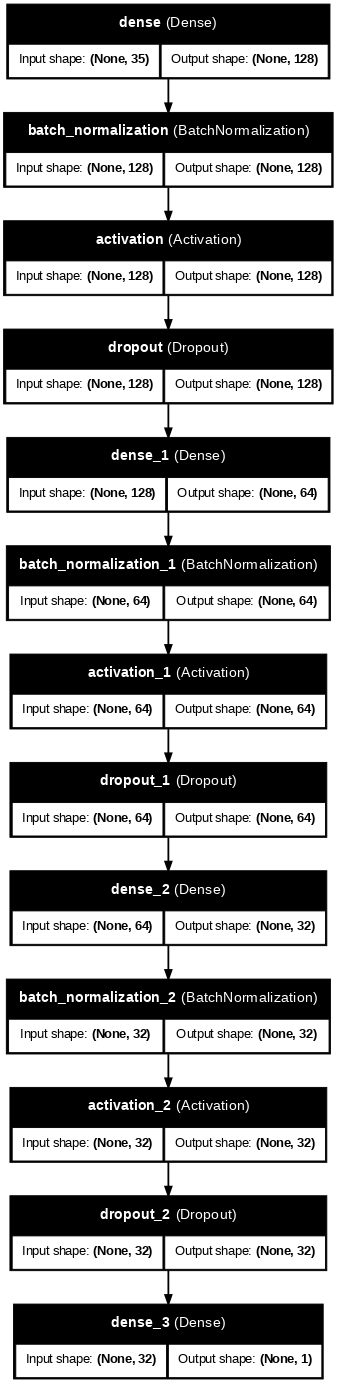

In [27]:
# DNN model
model = Sequential([
    Input(shape=(X_train_processed.shape[1],)),  
    Dense(128, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(64, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(32, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Show the model summary
model.summary()
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=65)

In [28]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Model Training
search = model.fit(
    X_train_processed, 
    y_train, 
    epochs=100,
    batch_size=2048,
    callbacks=[early_stopping],
    validation_split=0.2,
    verbose=0
)

# Best Val RMSE
# Evaluate on the test set
test_loss, test_mae = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Make predictions
y_pred = model.predict(X_test_processed)

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Test Loss (MSE): 1513.0081787109375
Test MAE: 38.896766662597656
24965/24965 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step
R² Score: 0.0009696834094987672


In [60]:
y_test

56569      129.03565
1183394     28.52128
855407      54.10512
239037      63.74824
1855852    110.51285
             ...    
482334      72.01756
1474100     34.83524
1537071    134.10007
972131     126.49181
3600030     75.06561
Name: Price, Length: 798864, dtype: float64

Comparison of Validation True and Predicted Values
24965/24965 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


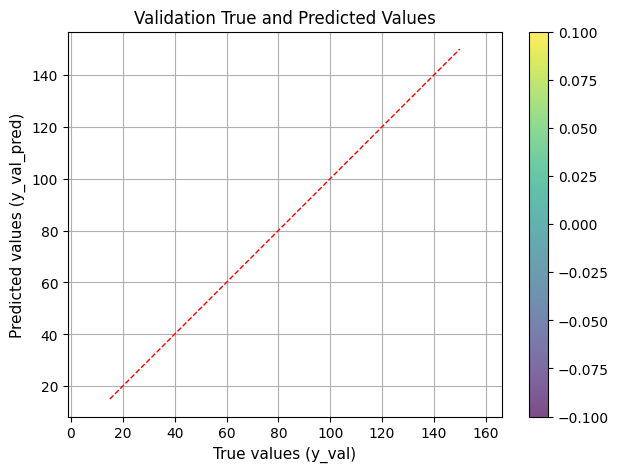

In [61]:
print("Comparison of Validation True and Predicted Values")

y_true = y_test
y_pred = model.predict(X_test_processed)

# Plot preparation
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, c=y_pred, cmap='viridis', s=20, alpha=0.7, linewidth=0.5)
cb = plt.colorbar()

# Plot the diagonal line
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)
plt.axis('equal')

plt.xlabel(f'True values (y_val)', fontsize=11)
plt.ylabel(f'Predicted values (y_val_pred)', fontsize=11)
plt.title('Validation True and Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

In [76]:
# Function to apply imputation
def apply_imputationa(X_test, numeric_columns, categorical_columns, imputer):
    X_test_imputed = X_test.copy()

    # Impute numeric columns
    if numeric_columns:
        X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])

    # Impute categorical columns with a placeholder
    if categorical_columns:
        X_test_imputed[categorical_columns] = X_test[categorical_columns].fillna('Missing')

    return X_test_imputed

In [66]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()


In [84]:
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
numeric_columns = df_test.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_test.select_dtypes(include=[object]).columns.tolist()
# imputer = KNNImputer(n_neighbors=5)
# df_test_imputed = apply_imputationa(df_test, numeric_columns, categorical_columns, imputer)
df_test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [85]:
df_test.info(), df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


(None,
 id                         0
 Brand                   6227
 Material                5613
 Size                    4381
 Compartments               0
 Laptop Compartment      4962
 Waterproof              4811
 Style                   5153
 Color                   6785
 Weight Capacity (kg)      77
 dtype: int64)

In [91]:
_, y_test_imputed = apply_imputation(X_train, df_test, numeric_columns, categorical_columns, imputer)

In [92]:
df_test_cat = encoder.fit_transform(y_test_imputed[categorical_columns])
df_test_num = scaler.fit_transform(y_test_imputed[numeric_columns])

In [93]:
Y_test_processed = np.hstack([df_test_num, df_test_cat])
Y_test_processed

array([[-1.73204215, -1.19182209,  0.38427719, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73202483,  0.53904094, -0.63526718, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73200751,  1.23138616, -0.88693198, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.73200751,  1.23138616,  1.27642945, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73202483,  1.57755877,  1.1156143 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73204215,  0.88521355,  1.60420562, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:

test_predictions = model.predict(test_data_processed)
test_predictions


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


array([[81.1082  ],
       [81.36924 ],
       [80.0266  ],
       ...,
       [81.03932 ],
       [81.285484],
       [79.68566 ]], dtype=float32)

In [30]:
df_submission = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

df_submission['Price'] = test_predictions # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['id', 'Price']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)
df_submission.to_csv('submission.csv', index=False)
df_submission

,id,Price
0,300000,81.108200
1,300001,81.369240
2,300002,80.026604
3,300003,80.994789
4,300004,78.468018
...,...,...
199995,499995,77.997780
199996,499996,78.611168
199997,499997,81.039322
199998,499998,81.285484


In [ ]:
# # Define numeric and categorical transformers
# numeric_transformer = Pipeline([
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine transformers
# data_transformations = ColumnTransformer([
#     ('num', numeric_transformer, numeric_columns),
#     ('cat', categorical_transformer, categorical_columns)
# ])

In [ ]:
# # Define the pipeline
# pipe = Pipeline([
#     ('data_transformations', data_transformations),
#     ('reg', RandomForestRegressor())  # Placeholder model
# ])

# # Define parameter grid for RandomizedSearchCV
# params_grid = [
#     {'reg': [RandomForestRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_features': [None, "sqrt", "log2"],
#      'reg__max_depth': [int(x) for x in np.linspace(5, 20, num=5)],
#      'reg__random_state': [42]},

#     {'reg': [LGBMRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_depth': [int(x) for x in np.linspace(3, 15, num=5)],
#      'reg__learning_rate': np.linspace(0.01, 0.3, num=5)},

#     {'reg': [XGBRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_depth': [int(x) for x in np.linspace(3, 15, num=5)],
#      'reg__learning_rate': np.linspace(0.01, 0.3, num=5),
#      'reg__gamma': np.linspace(0, 1, num=5),
#      'reg__lambda': np.linspace(0.1, 1, num=5)}
# ]

# # Cross Validator
# cross_validator = StratifiedShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=7)

# # RandomizedSearchCV
# best_model_pipeline = RandomizedSearchCV(
#     estimator=pipe,
#     param_distributions=params_grid,
#     n_iter=50,
#     scoring='r2',
#     refit=True,
#     n_jobs=-1,
#     cv=5,
#     random_state=21,
#     error_score='raise',
#     return_train_score=False
# )

In [ ]:
# # Compare imputation techniques
# results = {}
# for imputer_name, imputer in imputers.items():
#     print(f"Applying {imputer_name}...")
    
#     # Apply imputation
#     X_train_imputed, X_test_imputed = apply_imputation(X_train, X_test, numeric_columns, categorical_columns, imputer)
    
#     # Train the model
#     best_model_pipeline.fit(X_train_imputed, y_train)
    
#     # Evaluate the model
#     y_pred = best_model_pipeline.best_estimator_.predict(X_test_imputed)
    
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
    
#     # Store the results
#     results[imputer_name] = {'R²': r2, 'MAE': mae, 'RMSE': rmse}


In [ ]:
# # Print the results
# for imputer_name, result in results.items():
#     print(f"\n{imputer_name}:")
#     print(f"R² = {result['R²']}")
#     print(f"MAE = {result['MAE']}")
#     print(f"RMSE = {result['RMSE']}")

In [ ]:
# # Visualize the results
# plt.figure(figsize=(10, 5))
# plt.bar(results.keys(), [result['R²'] for result in results.values()], color='blue')
# plt.xlabel('Imputation Technique')
# plt.ylabel('R² Score')
# plt.title('Comparison of Imputation Techniques by R² Score')
# plt.show()

# # Choose the best imputation technique based on the results
# best_imputer = max(results, key=lambda x: results[x]['R²'])
# print(f"\nThe best imputation technique is: {best_imputer}")

In [ ]:
# X_train_final, X_test_final = apply_imputation(X_train, X_test, numeric_columns, categorical_columns, imputers[best_imputer])
# best_model_pipeline.fit(X_train_final, y_train)

# # Evaluate the final model
# y_pred_final = best_model_pipeline.best_estimator_.predict(X_test_final)

# final_r2 = r2_score(y_test, y_pred_final)
# final_mae = mean_absolute_error(y_test, y_pred_final)
# final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

# print("\n\n#---------------- Best Regression Model Found ----------------#\n\n", best_model_pipeline.best_estimator_[1])
# print("\n\n#---------------- Best Estimator's R² Score ----------------#\n\n", final_r2)
# print("\n\n#---------------- Mean Absolute Error (MAE) ----------------#\n\n", final_mae)
# print("\n\n#---------------- Root Mean Squared Error (RMSE) ----------------#\n\n", final_rmse)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# def fill_na_with_decision_trees(df, numeric_cols, categorical_cols):
#     df_copy = df.copy()
    
#     # Dictionary to store LabelEncoders for categorical columns
#     label_encoders = {}

#     # Encode categorical columns first
#     for col in categorical_cols:
#         le = LabelEncoder()
#         df_copy[col] = df_copy[col].astype(str)  # Convert to string (avoid NaN issues)
#         df_copy[col] = le.fit_transform(df_copy[col])  # Convert to numbers
#         label_encoders[col] = le  # Store encoder for inverse transformation

#     # Fill missing values in numerical columns using DecisionTreeRegressor
#     for col in numeric_cols:
#         if df_copy[col].isnull().sum() > 0:
#             dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
#             known_data = df_copy[df_copy[col].notna()]
#             unknown_data = df_copy[df_copy[col].isna()]

#             feature_cols = [c for c in known_data.columns if c != col]

#             if known_data.shape[0] > 1 and not known_data[feature_cols].empty:
#                 dt_reg.fit(known_data[feature_cols], known_data[col])
#                 df_copy.loc[df_copy[col].isna(), col] = dt_reg.predict(unknown_data[feature_cols])

#     # Fill missing values in categorical columns using DecisionTreeClassifier
#     for col in categorical_cols:
#         if df_copy[col].isnull().sum() > 0:
#             dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
#             known_data = df_copy[df_copy[col].notna()]
#             unknown_data = df_copy[df_copy[col].isna()]

#             feature_cols = [c for c in known_data.columns if c != col]

#             if known_data.shape[0] > 1 and not known_data[feature_cols].empty:
#                 dt_clf.fit(known_data[feature_cols], known_data[col])
#                 df_copy.loc[df_copy[col].isna(), col] = dt_clf.predict(unknown_data[feature_cols])

#     # Convert categorical columns back to original labels
#     for col in categorical_cols:
#         df_copy[col] = label_encoders[col].inverse_transform(df_copy[col].astype(int))

#     return df_copy

# # Apply the function to train & test data
# x_train = fill_na_with_decision_trees(x_train, numeric_columns, categorical_columns)
# x_test = fill_na_with_decision_trees(x_test, numeric_columns, categorical_columns)


In [ ]:
# # 1st -> Numeric Transformers
# numeric_transformer = Pipeline([
#     ('scaler', MinMaxScaler())
# ])

# # 2nd -> Categorical Transformers
# categorical_transformer = Pipeline([
#     ('leaveoneout', LeaveOneOutEncoder(sigma=0.1))
# ])

# # 3rd -> Combining Numeric & Categorical Pipelines
# data_transformations = ColumnTransformer([
#     ('num', numeric_transformer, numeric_columns),
#     ('cat', categorical_transformer, categorical_columns)
# ])

# # 4th -> Pipeline & RandomizedSearchCV
# pipe = Pipeline([
#     ('data_transformations', data_transformations),
#     ('reg', RandomForestRegressor())  # Placeholder model
# ])

# params_grid = [
#     {'reg': [RandomForestRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_features': [None, "sqrt", "log2"],
#      'reg__max_depth': [int(x) for x in np.linspace(5, 20, num=5)],
#      'reg__random_state': [42]},

#     {'reg': [LGBMRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_depth': [int(x) for x in np.linspace(3, 15, num=5)],
#      'reg__learning_rate': np.linspace(0.01, 0.3, num=5)},

#     {'reg': [XGBRegressor()],
#      'reg__n_estimators': [int(x) for x in np.linspace(10, 100, num=10)],
#      'reg__max_depth': [int(x) for x in np.linspace(3, 15, num=5)],
#      'reg__learning_rate': np.linspace(0.01, 0.3, num=5),
#      'reg__gamma': np.linspace(0, 1, num=5),
#      'reg__lambda': np.linspace(0.1, 1, num=5)}
# ]

# # Cross Validator
# cross_validator = StratifiedShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=7)

# # RandomizedSearchCV
# best_model_pipeline = RandomizedSearchCV(
#     estimator=pipe,
#     param_distributions=params_grid,
#     n_iter=50,
#     scoring='r2',
#     refit=True,
#     n_jobs=-1,
#     cv=5,
#     random_state=21,
#     error_score='raise',
#     return_train_score=False
# )

# # Train Best Model
# best_model_pipeline.fit(x_train, y_train)

# # Evaluate Best Model
# y_pred = best_model_pipeline.best_estimator_.predict(x_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print("\n\n#---------------- Best Regression Model Found ----------------#\n\n", best_model_pipeline.best_estimator_[1])
# print("\n\n#---------------- Best Estimator's R² Score ----------------#\n\n", r2)
# print("\n\n#---------------- Mean Absolute Error (MAE) ----------------#\n\n", mae)
# print("\n\n#---------------- Root Mean Squared Error (RMSE) ----------------#\n\n", rmse)


In [ ]:
# Function to apply imputation
# def apply_imputation(X_test, numeric_columns, categorical_columns, imputer):
#     X_test_imputed = X_test.copy()

#     # Impute numeric columns
#     if numeric_columns:
#         X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])

#     # Impute categorical columns with a placeholder
#     if categorical_columns:
#         X_test_imputed[categorical_columns] = X_test[categorical_columns].fillna('Missing')

#     return X_test_imputed

In [ ]:
# df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

In [ ]:
# df_test = apply_imputation(df_test, numeric_columns, categorical_columns, imputers[best_imputer])

In [ ]:
# test_predictions = best_model_pipeline.best_estimator_.predict(df_test)
# df_submission = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

# df_submission['Price'] = test_predictions # Adding a column with predicted values

# df_submission.drop(df_submission.columns.difference(['id', 'Price']), axis=1, inplace=True) # Selecting only needed columns

# df_submission.head(10)

In [ ]:
# df_submission.to_csv('submission.csv', index=False)


In [ ]:
# df_submission